# Parks Metric

I chose to use the number of public parks in each neighborhood as one of my metrics for finding the “best” neighborhood in Pittsburgh. Parks are important because they provide green space, places to exercise, and areas for community events and social life. A neighborhood with more parks usually offers more chances for people to relax, play sports, walk their dogs, and enjoy nature close to home. Because of that, counting how many parks are located in each neighborhood is a good way to measure the amount of recreational space and outdoor resources that residents can access.

The dataset in **parks.csv** includes one row per park with information such as the park’s name, type, and neighborhood. I ranked neighborhoods by the number of parks and show the top 10 as a bar graph. The neighborhood with the highest count of parks are considered the best by this metric.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the parks dataset
df = pd.read_csv("parks.csv")
df.head(10)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,9,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


# Analysis

For this metric, I only want to count real parks. The dataset includes different types of locations, so the first step is to filter the data to keep only rows where the `type` column is `"Park"`. Then I group the filtered data by `neighborhood` and count how many parks are in each neighborhood. This gives me a new table with two columns: the neighborhood name and the number of parks there.

After I have the counts, I sort the neighborhoods from highest to lowest based on how many parks they have. From this sorted table, I keep only the top 10 neighborhoods. Finally, I plot a bar graph where the x-axis shows the neighborhoods and the y-axis shows the number of parks in each neighborhood. I also add labels on top of each bar, so it is easier to see the exact count for each neighborhood.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the parks dataset
df = pd.read_csv("parks.csv")
df.head(10)#Keep only rows where the type is exactly "Park"
parks_only = df[df["type"] == "Park"].copy()

#Group by neighborhood and count number of parks
park_counts = (
    parks_only.groupby("neighborhood")["_id"]
    .count()
    .reset_index()
    .rename(columns={"_id": "num_parks"})
)

#Sort by number of parks (descending) and keep top 20
top20_parks = park_counts.sort_values("num_parks", ascending=False).head(20)

top20_parks

,neighborhood,num_parks
5,Beechview,6
55,South Side Slopes,6
30,Hazelwood,5
64,Troy Hill,5
43,Mount Washington,5
22,East Liberty,4
40,Marshall-Shadeland,4
23,Elliott,4
52,Sheraden,4
45,North Shore,3


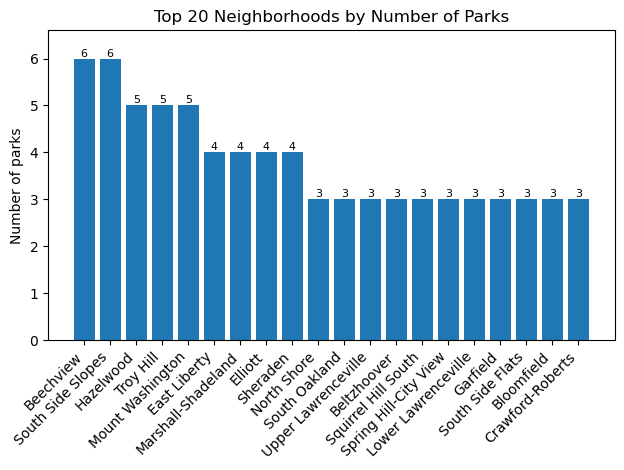

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the parks dataset
df = pd.read_csv("parks.csv")
df.head(10)#Keep only rows where the type is exactly "Park"
parks_only = df[df["type"] == "Park"].copy()

#Group by neighborhood and count number of parks
park_counts = (
    parks_only.groupby("neighborhood")["_id"]
    .count()
    .reset_index()
    .rename(columns={"_id": "num_parks"})
)

#Sort by number of parks (descending) and keep top 20
top20_parks = park_counts.sort_values("num_parks", ascending=False).head(20)

top20_parks
#Create bar graph of top 10 neighborhoods by number of parks
plt.figure()
bars = plt.bar(top20_parks["neighborhood"], top20_parks["num_parks"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of parks")
plt.title("Top 20 Neighborhoods by Number of Parks")

#Add a little space above tallest bar
plt.ylim(0, top20_parks["num_parks"].max() * 1.10 if top10_parks["num_parks"].max() > 0 else 1)

#Add value labels on top of each bar
ax = plt.gca()
for b in bars:
    y = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        y,
        str(int(y)),
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Code Description

In the first code cell, I import the `pandas` and `matplotlib.pyplot` libraries and read in the **parks.csv** file. The `head(20)` command shows the first 10 rows so I can quickly check that the columns loaded correctly.

In the analysis code, I start by filtering the dataset to keep only rows where `type == "Park"`, because I only want to count actual parks. Then I group the data by the `neighborhood` column and use `.count()` on the `_id` column to get the number of parks in each neighborhood. I rename this count column to `num_parks` to make it easier to understand.

Next, I sort the results in descending order by `num_parks`, so neighborhoods with more parks appear at the top. I keep only the first 10 rows to get the top 10 neighborhoods. Finally, I create a bar graph using `matplotlib`, with neighborhoods on the x-axis and the number of parks on the y-axis. I rotate the x-axis labels for readability and add the exact park counts above each bar so it is clear how many parks each neighborhood has.


# Conclusion

When I look at the bar graph of the top 10 neighborhoods by number of parks, I first focus on the tallest bars. The two highest bars belong to **South Side Slopes** and **Beechview**, which are tied for first place with **6 parks** each. This means that, based purely on the number of parks, these two neighborhoods offer the most park options for residents.

Next, I look at the other neighborhoods in the top 10, such as Mount Washington, Hazelwood, and Troy Hill, which each have 5 parks. These neighborhoods still provide strong access to green spaces, but they fall just below South Side Slopes and Beechview in terms of total park count.

Because my metric is “the neighborhoods with the most parks are the best,” I treat a tie at the top as equally strong performance. Based on this metric, the best neighborhoods in Pittsburgh are **South Side Slopes** and **Beechview**, since they both have the highest number of parks in the city. Neighborhoods like Mount Washington, Hazelwood, and Troy Hill also stand out as good options, but they come just behind the two leaders in this particular ranking.
